In [70]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import os

In [6]:
os.getcwd()

'C:\\Users\\Vozon'

In [10]:
os.chdir('D:\\ISHAN\\SY_AI-A_Sem4\\DMADM\\CP')

In [11]:
os.getcwd()

'D:\\ISHAN\\SY_AI-A_Sem4\\DMADM\\CP'

In [ ]:
# Functions with use

# Core Python

## append() --  Adds its argument as a single element to the end of a list. The length of the list increases by one.

# Pandas

# Numpy

In [47]:
#importing dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
#dataset info(MetaData)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [69]:
# Dimensionality Analysis
df.shape

(1000, 5)

In [59]:
# Descriptive Statistics
summary = df.describe()
df

,gender,race/ethnicity,parent.ed,lunch,Course_Project Status,GD_Score,GPPT_Score,MSE_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [61]:
#Renaming the column names by creating a dictionary

dict = {'parental level of education': 'parent.ed',
        'test preparation course': 'Course_Project Status',
        'math score': 'GD_Score',
        'reading score': 'GPPT_Score',
        'writing score': 'MSE_Score'}

df.rename(columns=dict,inplace=True)
df

,gender,race/ethnicity,parent.ed,lunch,Course_Project Status,GD_Score,GPPT_Score,MSE_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [63]:
#Removal of unnecessary columns 
df.drop(['parent.ed', 'lunch'], axis=1, inplace=True)
df.head()

,gender,Course_Project Status,GD_Score,GPPT_Score,MSE_Score
0,female,none,72,72,74
1,female,completed,69,90,88
2,female,none,90,95,93
3,male,none,47,57,44
4,male,none,76,78,75


In [64]:
# Checking if there is any missing/null values
df.isnull().sum()

gender                   0
Course_Project Status    0
GD_Score                 0
GPPT_Score               0
MSE_Score                0
dtype: int64

In [123]:
#Calculating the average score(avg_score = (GD_Score + GPPT_Score + MSE_Score)/3)
avg_score=df.mean(axis='columns')
avg_score

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [125]:
#Adding a new column named Average_score and adding the avg_score values to the column
df['Average_score'] = avg_score
df.head()

,gender,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,Average_score
0,female,none,72,72,74,72.666667
1,female,completed,69,90,88,82.333333
2,female,none,90,95,93,92.666667
3,male,none,47,57,44,49.333333
4,male,none,76,78,75,76.333333


In [146]:
#Counting the number of male and female
classify = df.groupby('gender').count()
classify

,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,Average_score
gender,,,,,
female,518,518,518,518,518
male,482,482,482,482,482


<AxesSubplot:xlabel='gender'>

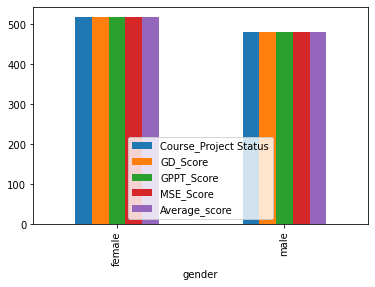

In [153]:
classify.plot.bar()

In [ ]:
# hvplots

grpA = df.loc[df['target'] == 0, 'race/ethnicity'].value_counts().hvplot.bar(alpha=0.4)
grpB = df.loc[df['target'] == 1, 'race/ethnicity'].value_counts().hvplot.bar(alpha=0.4)

(grpA * grpB).opts(
    title="Race/Ethnicity Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)